<a href="https://colab.research.google.com/github/Fordfire337/CS-4410-intro-machine-learning/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Ex 15.17 Binary Classification with the Breast Cancer Dataset

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC











In [8]:
# Loading Dataset

breast_cancer = load_breast_cancer()

print("Dataset object type:", type(breast_cancer))
print("Feature names (first 5):", breast_cancer.feature_names[:5])
print("Target names:", breast_cancer.target_names)

# Checking Sample And Target Sizes

X = breast_cancer.data
y = breast_cancer.target

print("\nSamples (X rows):", X.shape[0])
print("Features (X cols):", X.shape[1])
print("Targets (y):", y.shape)
print("Class counts [0,1]:", np.bincount(y))

Dataset object type: <class 'sklearn.utils._bunch.Bunch'>
Feature names (first 5): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Target names: ['malignant' 'benign']

Samples (X rows): 569
Features (X cols): 30
Targets (y): (569,)
Class counts [0,1]: [212 357]


In [9]:
# Splitting Data for Training+Testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=11,
    stratify=y
)

# Training/Testing Set Sizes

print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)


X_train shape: (426, 30)
y_train shape: (426,)
X_test shape : (143, 30)
y_test shape : (143,)



GaussianNB test accuracy (score): 0.9230769230769231

Confusion Matrix:
 [[45  8]
 [ 3 87]]

Classification Report:

              precision    recall  f1-score   support

   malignant       0.94      0.85      0.89        53
      benign       0.92      0.97      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



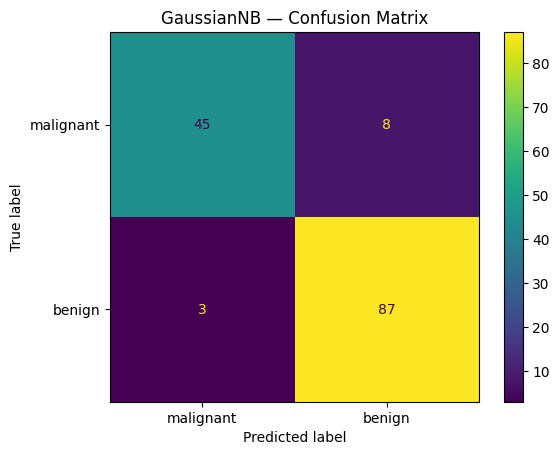

In [10]:
# Creating the Model

nb = GaussianNB()


# Training + Predict

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)


# Estimator Method score

test_accuracy = nb.score(X_test, y_test)
print("\nGaussianNB test accuracy (score):", test_accuracy)


# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


# Classification Report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))


# Visualizing the Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(values_format="d")
plt.title("GaussianNB — Confusion Matrix")
plt.show()

In [11]:

# K-Fold Cross-Validation

kfold = KFold(n_splits=10, random_state=11, shuffle=True)


# Using the KFold Object with Function cross_val_score

scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

print("\nGaussianNB 10-fold CV scores:\n", scores)
print("GaussianNB 10-fold CV mean:", scores.mean())
print("GaussianNB 10-fold CV std :", scores.std())




GaussianNB 10-fold CV scores:
 [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
GaussianNB 10-fold CV mean: 0.9384711779448622
GaussianNB 10-fold CV std : 0.02750305414538902


In [12]:
# Running Multiple Models to Find the Best One


estimators = {
    "GaussianNB": nb,
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(solver="lbfgs", max_iter=10000),
    "SVC": SVC(gamma="scale")
}

print("\nModel comparison (10-fold CV accuracy):")
results = []
for name, model in estimators.items():
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    mean_acc = cv_scores.mean()
    std_acc = cv_scores.std()
    results.append((name, mean_acc, std_acc))
    print(f"  {name:20s} mean={mean_acc:.4f}  std={std_acc:.4f}")

best = max(results, key=lambda t: t[1])
print(f"\nBest by mean CV accuracy: {best[0]} (mean={best[1]:.4f}, std={best[2]:.4f})")



Model comparison (10-fold CV accuracy):
  GaussianNB           mean=0.9385  std=0.0275
  KNeighborsClassifier mean=0.9279  std=0.0201
  LogisticRegression   mean=0.9508  std=0.0302
  SVC                  mean=0.9192  std=0.0352

Best by mean CV accuracy: LogisticRegression (mean=0.9508, std=0.0302)
